Understand the data <br>
We will be using customer churn data from the telecom industry for this exercises. The data file is called Orange_Telecom_Churn_Data.csv
- Read the  data into df
- Display the top five rows
- Display the last three rows
- Check the total number of entries you have
- Check the No of features
- Print features Names(Column Names)
- Print the row indices of the dataframe
- Check the dtype of each and every columns
- Description for Numerical Column min,max,count,25%,50%,75%,std
- Description for the categorical Columns count,top,freq
- Missing value count column wise
- Total Missing values count in the DataFrame
- If there are any missing values replace them.
- Check the output for the info function
- Access 3,5,7 columns using iloc,loc and without using any of them
- How many unique states are there
- How many customers are churned
- How many are not churned   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data into df 
df = pd.read_csv("https://raw.githubusercontent.com/sumathi16/Machine-Learning-with-Python/master/data/Intel%20Data/Orange_Telecom_Churn_Data.csv")

In [3]:
#Display the top five rows
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Display the last three rows
df.tail(3)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.9,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.1,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False
4999,VT,86,415,373-8058,no,yes,34,129.4,102,22.0,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,False


In [5]:
# Check the total number of entries you have
df.count().sum() #df.shape[0]

105000

In [6]:
# Check the No of features
df.shape[1]

21

In [7]:
# Print features Names(Column Names)
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [8]:
# Print the row indices of the dataframe
df.index

RangeIndex(start=0, stop=5000, step=1)

In [9]:
#Check the dtype of each and every columns
df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [10]:
# Description for Numerical Column min,max,count,25%,50%,75%,std
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
# Description for the categorical Columns count,top,freq
df.describe(include = object)

,state,phone_number,intl_plan,voice_mail_plan
count,5000,5000,5000,5000
unique,51,5000,2,2
top,WV,390-4003,no,no
freq,158,1,4527,3677


In [12]:
# Missing value count column wise
df.isna().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

In [13]:
# Total Missing values count in the DataFrame
df.isna().sum().sum()

0

In [14]:
# If there are any missing values replace them.
# there is no missing values

In [15]:
# Check the output for the info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null object
intl_plan                        5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

In [16]:
# Access 3,5,7 columns using iloc,loc and without using any of them
df.iloc[:,3:8:2]

,phone_number,voice_mail_plan,total_day_minutes
0,382-4657,yes,265.1
1,371-7191,yes,161.6
2,358-1921,no,243.4
3,375-9999,no,299.4
4,330-6626,no,166.7
...,...,...,...
4995,365-8751,yes,235.7
4996,334-9736,no,184.2
4997,333-6861,no,140.6
4998,394-2206,no,188.8


In [17]:
df.loc[:,["phone_number","voice_mail_plan","total_day_minutes"]]

,phone_number,voice_mail_plan,total_day_minutes
0,382-4657,yes,265.1
1,371-7191,yes,161.6
2,358-1921,no,243.4
3,375-9999,no,299.4
4,330-6626,no,166.7
...,...,...,...
4995,365-8751,yes,235.7
4996,334-9736,no,184.2
4997,333-6861,no,140.6
4998,394-2206,no,188.8


In [18]:
# How many unique states are there
df.nunique()

state                              51
account_length                    218
area_code                           3
phone_number                     5000
intl_plan                           2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
churned                             2
dtype: int64

In [19]:
df.state.nunique()

51

In [20]:
# How many customers are churned
df["churned"].sum()

707

In [68]:
# How many are not churned
df.churned.value_counts()[0]

4293

In [23]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [24]:
# Seperate the features and target
features = df[['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
target = df["churned"]

In [25]:
features

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [26]:
# get the numerical column names from fetaures
num_col = features.columns[features.dtypes != object]
print("num_col :",num_col)
# Get the categorical column names from features
cat_col = features.columns[features.dtypes == object]
print("cat_col :", cat_col)

num_col : Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')
cat_col : Index(['state', 'phone_number', 'intl_plan', 'voice_mail_plan'], dtype='object')


In [27]:
len(num_col)

16

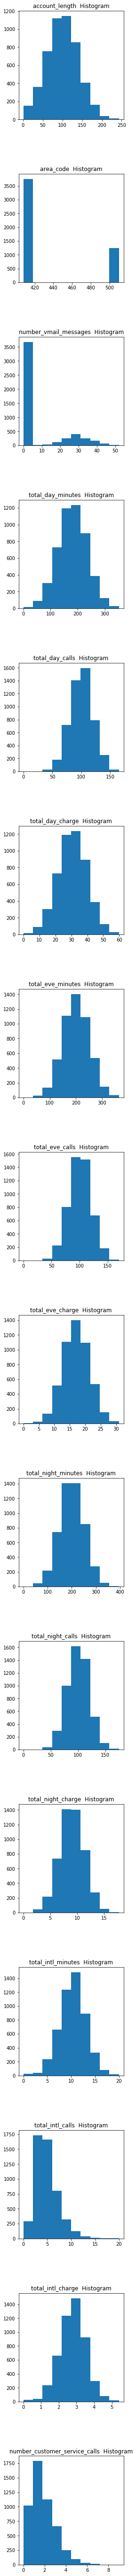

In [28]:
# Draw the histogram for all the numerical columns
plt.figure(figsize=(10,100))
plt.subplots_adjust(hspace =0.5, wspace=0.5)
for i in range((len(num_col))):
    plt.subplot(16,2,2*i+1)
    plt.hist(df[num_col[i]])
    plt.title(num_col[i]+"  Histogram")

# If there are skewed data columns apply np.log or np.log1p and overwrite the columns with results
# np.log(num_col)

In [29]:
#np.log()

In [30]:
# df1 = df.drop("churned",axis = 1)
# sns.pairplot(df1)

## 1. Applying KNN with Numerical Data Only

In [31]:
# Get the numerical columns data only into num_features
num_features = df[num_col]
num_features

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,408,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
4996,152,415,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
4997,61,415,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
4998,109,510,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [32]:
target

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996     True
4997    False
4998    False
4999    False
Name: churned, Length: 5000, dtype: bool

In [33]:
# Split the data num_features and target into 80% for 
# training 20% for testing and random state 40
# store the results in X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(num_features,target, test_size = 0.2, random_state= 40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 16)
(1000, 16)
(4000,)
(1000,)


In [34]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [35]:
# Train the KNN with X_train,y_train
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
#predict the output for X_train store it in variable y_out

y_out = knn.predict(x_train)
print(y_out)

# calculate the accuarcy for y_out,y_train

from sklearn.metrics import accuracy_score
round(accuracy_score(y_out,y_train)*100,2)

[False False False ... False  True False]


90.38

In [37]:
#predict the output for X_test store it in variable y_pred
y_pred = knn.predict(x_test)
print(y_pred)
# calculate the accuarcy for y_pred,y_test
round(accuracy_score(y_pred,y_test)*100,2)

[False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False Fa

87.4

## 2. Applying KNN with Numerical scaled Data Only

In [38]:
# Apply MinMaxSCaler for num_features and store the 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(num_features)
num_features_sc = pd.DataFrame(sc.transform(num_features),columns  = num_features.columns)

# result into num_features_sc
num_features_sc

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.068627,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.068627,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.068627,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,0.000000,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,0.068627,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.000000,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.068627,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.068627,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,1.000000,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [39]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [40]:
# Split the data num_features_sc and target into 80% for 
# training 20% for testing and random state 40
# store the results in X_train_sc,X_test_sc,y_train,

x_train_sc,x_test_sc,y_train_sc,y_test_sc = train_test_split(num_features_sc,target, test_size = 0.2, random_state= 40)
print(x_train_sc.shape)
print(x_test_sc.shape)
print(y_train_sc.shape)
print(y_test_sc.shape)

(4000, 16)
(1000, 16)
(4000,)
(1000,)


In [41]:
# Train the KNN with X_train_sc,y_train_sc
knn_sc = KNeighborsClassifier()
knn_sc.fit(x_train_sc,y_train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
#predict the output for X_train_sc store it in variable y_out
y_out_sc = knn_sc.predict(x_train_sc)
# calculate the accuarcy for y_out,y_train
round(accuracy_score(y_out_sc,y_train_sc)*100,2)

91.72

In [43]:
#predict the output for X_test_sc store it in variable y_pred
y_pred_sc = knn_sc.predict(x_test_sc)

# calculate the accuarcy for y_pred,y_test

round(accuracy_score(y_pred_sc,y_test_sc)*100,2)

88.7

## 3.Apply KNN with five numerical columns

In [44]:
few_features = df.loc[:,["number_vmail_messages","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"]]

In [45]:
few_features

,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge
0,25,45.07,16.78,11.01,2.70
1,26,27.47,16.62,11.45,3.70
2,0,41.38,10.30,7.32,3.29
3,0,50.90,5.26,8.86,1.78
4,0,28.34,12.61,8.41,2.73
...,...,...,...,...,...
4995,40,40.07,18.96,13.39,2.67
4996,0,31.31,21.83,9.61,3.97
4997,0,23.90,14.69,9.56,3.67
4998,0,32.10,14.59,10.10,2.30


In [46]:
# Choose five columns in features 
print(few_features.columns)
sel_feature_names = few_features # Give selected column names

Index(['number_vmail_messages', 'total_day_charge', 'total_eve_charge',
       'total_night_charge', 'total_intl_charge'],
      dtype='object')


In [47]:
# Get the data of the selected columns into selected_features
selected_features = sel_feature_names

In [48]:
# Split the data selected_features and target into 80% for 
# training 20% for testing and random state 40
# store the results in X_train_sel,X_test_sel,y_train,y_test
x_train_sel,x_test_sel,y_train_sel,y_test_sel = train_test_split(selected_features,target, test_size = 0.2, random_state= 40)

In [49]:
# Train the KNN with X_train_sel,y_train_sel
knn_sel = KNeighborsClassifier()
knn_sel.fit(x_train_sel,y_train_sel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
#predict the output for X_train_sel store it in variable y_out

y_out_sel = knn_sel.predict(x_train_sel)

# calculate the accuarcy for y_out,y_train

round(accuracy_score(y_out_sel,y_train_sel)*100,2)

91.82

In [51]:
#predict the output for X_test_sel store it in variable y_pred

y_pred_sel  = knn_sel.predict(x_test_sel)

# calculate the accuarcy for y_pred,y_test

round(accuracy_score(y_pred_sel,y_test_sel)*100,2)

89.8

## 4.Apply KNN with Total data

In [65]:
num_col

Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [52]:
sc = MinMaxScaler()
features[num_col] = sc.fit_transform(features[num_col])
features[num_col]

C:\Users\saiku\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\saiku\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.068627,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.068627,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.068627,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,0.000000,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,0.068627,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.000000,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,0.623967,0.068627,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,0.247934,0.068627,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,0.446281,1.000000,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [53]:
features

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,0.524793,0.068627,382-4657,no,yes,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,OH,0.438017,0.068627,371-7191,no,yes,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,NJ,0.561983,0.068627,358-1921,no,no,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,OH,0.342975,0.000000,375-9999,yes,no,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,OK,0.305785,0.068627,330-6626,yes,no,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,0.202479,0.000000,365-8751,no,yes,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222
4996,WV,0.623967,0.068627,334-9736,no,no,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333
4997,DC,0.247934,0.068627,333-6861,no,no,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111
4998,DC,0.446281,1.000000,394-2206,no,no,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000


In [54]:
#  create a varible with name full_data with numerical columns data in the features 
full_data = features.drop("phone_number", axis = 1)
# replaced with scaled values
full_data.shape

(5000, 19)

In [55]:
cat_col = features[cat_col]

In [56]:
cat_col = cat_col.drop("phone_number", axis = 1)

### Note the full_data should contain same number of columns as features. Where numerical column values are replaced with scaled data

In [57]:
# Apply pd.get_dummies function for the dataframe full_data and assign the result to full_data
full_data = pd.get_dummies(full_data)
full_data

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,intl_plan_no,intl_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.524793,0.068627,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,...,0,0,0,0,0,0,1,0,0,1
1,0.438017,0.068627,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,...,0,0,0,0,0,0,1,0,0,1
2,0.561983,0.068627,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,...,0,0,0,0,0,0,1,0,1,0
3,0.342975,0.000000,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,...,0,0,0,0,0,0,0,1,1,0
4,0.305785,0.068627,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.000000,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,...,0,0,0,0,0,0,1,0,0,1
4996,0.623967,0.068627,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,...,0,0,0,0,1,0,1,0,1,0
4997,0.247934,0.068627,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,...,0,0,0,0,0,0,1,0,1,0
4998,0.446281,1.000000,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,...,0,0,0,0,0,0,1,0,1,0


In [58]:
# Check the number of columns in the full data
full_data.shape[1]

71

In [59]:
# Split the full_data and target into 80% for 
# training 20% for testing and random state 40
# store the results in full_train,full_test_sel,y_train,y_test
x_train_full,x_test_full,y_train_full,y_test_full = train_test_split(full_data,target, test_size = 0.2, random_state= 40)
print(x_train_full.shape)
print(x_test_full.shape)
print(y_train_full.shape)
print(y_test_full.shape)

(4000, 71)
(1000, 71)
(4000,)
(1000,)


In [60]:
# Train the KNN with x_train_full ,y_train_full
knn_full = KNeighborsClassifier()
knn_full.fit(x_train_full,y_train_full)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
#predict the output for x_train_full store it in variable y_out_full
y_out_full_train = knn_full.predict(x_train_full)
# calculate the accuarcy for y_out_full,y_train_full
round(accuracy_score(y_out_full_train,y_train_full)*100,2)

89.02

In [62]:
#predict the output for x_test_full store it in variable y_pred_full
y_pred_full_test = knn_full.predict(x_test_full)
# calculate the accuarcy for y_pred,y_test
round(accuracy_score(y_pred_full_test,y_test_full)*100,2)

86.3

## Compare the training and testing scores for the above four cases.
- Applying KNN with Numerical Data Only
- Applying KNN with Numerical scaled Data Only
- Apply KNN with five numerical columns
- Apply KNN with Total data